<font style="font-size:28px;" align="left"><b> The gates of photonic quantum computers </b></font>
<br>
_prepared by Schrödinger Cats_

As with the other Quantum Computing (QC) platforms where you can apply various gates on qubits, we can also apply various gates (often called operations in photonic QC) to our qumodes. As you have learned through the previous module, the typical state of photonic QC is different from the qubit based QC (although you can also program a qubit to your photon, which we will learn later). The typical operations (gates) that you can apply to a qumode are also a little bit different from that of qubits.

In [1]:
#import strawberry fields
import strawberryfields as sf
from strawberryfields.ops import *

#import numpy for fast array operations and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Before we discuss operations on a qumode, we need to learn how to visualize the quantum state of a qumode. This might be a litlle bit abstract at first glance. Let us declare a qumode in vacuum state first.

In [2]:
#declare one qumode
prog = sf.Program(1)

#initialize a vacuum state
with prog.context as q:
    Vac | q[0]

#set simulator engine as Gaussian
eng = sf.Engine('gaussian')

#run the engine
state = eng.run(prog).state

We can check the quadrature probability density function of the state by calling the x_quad_values and p_quad_values, which are stored in the state object when we run the engine.

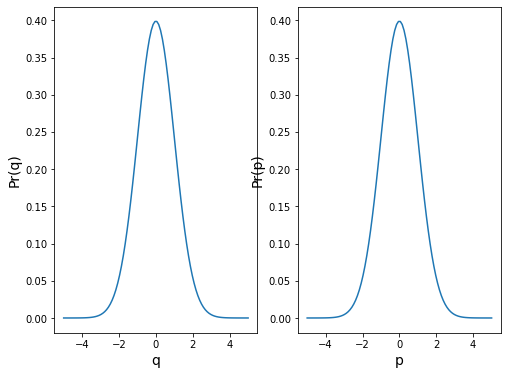

In [3]:
#create array of points in the X and P quadratures
Q, P = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
#compute the probability density function evaluated at the points for both X and P
Qvals = state.x_quad_values(0, Q, P)
Pvals = state.p_quad_values(0, Q, P)

fig = plt.figure(figsize=(8,6))

q_axis = fig.add_subplot(121)
q_axis.set_xlabel('q', fontsize=14)
q_axis.set_ylabel('Pr(q)', fontsize=14)
q_plot, = q_axis.plot(Q, Qvals)

p_axis = fig.add_subplot(122)
p_axis.set_xlabel('p', fontsize=14)
p_axis.set_ylabel('Pr(p)', fontsize=14)
p_plot, = p_axis.plot(P, Pvals)

<br>
<font style="font-size:20px;" align="left"><b> Visualizing qumodes using Wigner function

In order to visualize the state, people use the Wigner function. As you have learned, the quantum state of light can be characterized by the distribution of the $X$ and $P$ quadratures. The Wigner function is used to link the quantum state to the distribution of the quadratures (which is often called the phase space). In general, Wigner function, integrated along one quadrature axis, will give us a probability density function along a quadrature axis perpendicular to that.

The Gaussian states that we learned previously, are in fact the states which have Gaussian-shaped Wigner function. We will not study Wigner functions here. What you need to know is that, for Gaussian states, the Wigner function is the same as the two-dimensional probability density function of the quadratures of the qumode.

(0.0, 0.15)

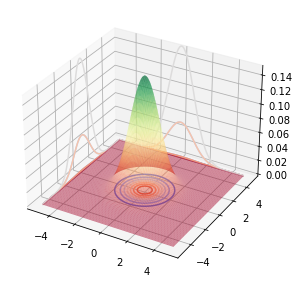

In [4]:
fig = plt.figure()
#create array of points in X and P quadratures
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)

#compute the Wigner function evaluated at the points
Z = state.wigner(0, X, P)

#create a surface plot of the Wigner function
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
#you can control the transparency using alpha
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5,rstride=1, cstride=1,alpha=0.5)

#add three contour plots projected at each axis to better visualize the surface plot
ax.contour(X, P, Z, zdir='x', cmap=cm.coolwarm, offset=-5)
ax.contour(X, P, Z, zdir='y', cmap=cm.coolwarm, offset=5)
ax.contour(X, P, Z, zdir='z', cmap=cm.coolwarm, offset=0)
fig.set_size_inches(4.8, 5)
ax.set_zlim(0, 0.15)

<br>
<font style="font-size:20px;" align="left"><b> Displacement gate

As with the other quantum computing platforms, we can perform operations (or gates) on our quantum states (which are usually qubits in the other platforms). One of the operation we can do for a Gaussian state is called displacement gate, which translates (or shifts) the quadrature distributions along an axis. In Strawberry Fields (SF), it is implemented by the gate Dgate($\alpha$) where $\alpha = re^{i\phi}$ with $r \geq 0$ and $\phi \in \left[0,\pi\right)$. Its action on the quadrature operators are as follows

$D^{\dagger}(\alpha) \hat{x} D(\alpha)=\hat{x}+\sqrt{2 \hbar} \operatorname{Re}(\alpha) I$

$D^{\dagger}(\alpha) \hat{p} D(\alpha)=\hat{p}+\sqrt{2 \hbar} \operatorname{Im}(\alpha) I$

i.e., it shifts the position quadrature ($X$) by 2Re$\left(\alpha\right)$ and the momentum quadrature ($P$) by 2Im$\left(\alpha\right)$. This is due to the convention that $\hbar = 2$ in SF. It is represented using the following circuit symbol

<a><img src="./Dgate.svg"  align="left" width="150"></a>

Let's try to implement it

In [5]:
prog = sf.Program(1)

with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    #displace the phase space two units along X axis (the angle is zero degree)
    Dgate(1) | q[0]

eng.reset()
state = eng.run(prog).state

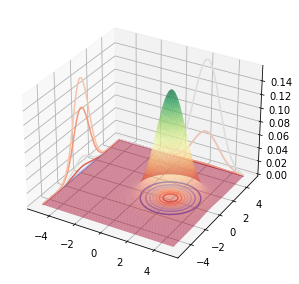

In [6]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5,rstride=1, cstride=1,alpha=0.5)
ax.contour(X, P, Z, zdir='x', cmap=cm.coolwarm, offset=-5)
ax.contour(X, P, Z, zdir='y', cmap=cm.coolwarm, offset=5)
ax.contour(X, P, Z, zdir='z', cmap=cm.coolwarm, offset=0)
fig.set_size_inches(4.8, 5)

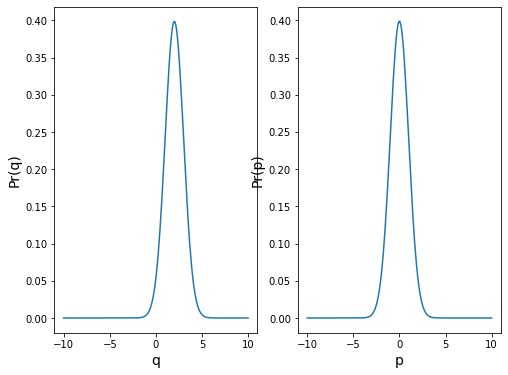

In [7]:
Q, P = np.linspace(-10, 10, 200), np.linspace(-10, 10, 200)
Qvals = state.x_quad_values(0, Q, P)
Pvals = state.p_quad_values(0, Q, P)

fig = plt.figure(figsize=(8,6))

q_axis = fig.add_subplot(121)
q_axis.set_xlabel('q', fontsize=14)
q_axis.set_ylabel('Pr(q)', fontsize=14)
q_plot, = q_axis.plot(Q, Qvals)

p_axis = fig.add_subplot(122)
p_axis.set_xlabel('p', fontsize=14)
p_axis.set_ylabel('Pr(p)', fontsize=14)
p_plot, = p_axis.plot(P, Pvals)

<br>
<font style="font-size:20px;" align="left"><b> Squeezing gate

Another thing we can do is to squeeze the distribution of the quadratures along a certain axis (you will see what it means). We use the squeezing gate. The operator is denoted by $S\left(z\right)$ and in SF it is implemented by the Sgate($z$), where $z$ is a complex number. In polar coordinate, $z = re^{i\phi}$. $r$ specifies how much squeezing and $\phi$ controls the direction you want to squeeze. The action it does can be seen from the action on the quadrature operators as follows

$S^{\dagger}(z) \hat{x}_{\phi} S(z)=e^{-r} \hat{x}_{\phi}, \quad S^{\dagger}(z) \hat{p}_{\phi} S(z)=e^{r} \hat{p}_{\phi}$

Here $\hat{x}_{\phi}$ is the rotated $X$ quadrature by $\phi$ radians.

The circuit symbol for the Sgate is

<a><img src="./Sgate.svg"  align="left" width="150"></a>

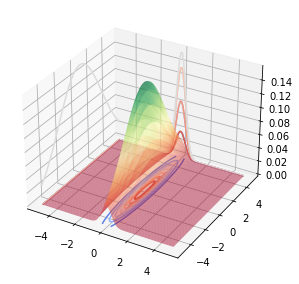

In [8]:
prog = sf.Program(1)

#squeeze along X axis with parameter r = 1
with prog.context as q:
    Vac | q[0]
    S = Sgate(1)
    S | q[0]

state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5,rstride=1, cstride=1,alpha=0.5)
ax.contour(X, P, Z, zdir='x', cmap=cm.coolwarm, offset=-5)
ax.contour(X, P, Z, zdir='y', cmap=cm.coolwarm, offset=5)
ax.contour(X, P, Z, zdir='z', cmap=cm.coolwarm, offset=0)
fig.set_size_inches(4.8, 5)

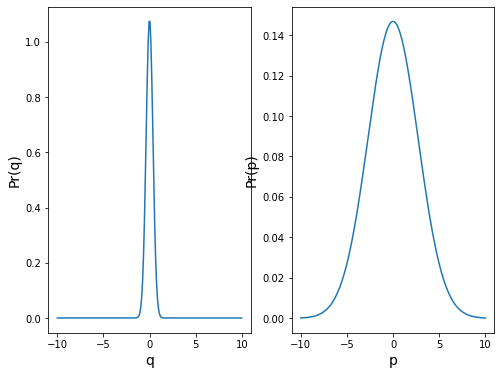

In [9]:
Q, P = np.linspace(-10, 10, 200), np.linspace(-10, 10, 200)
Qvals = state.x_quad_values(0, Q, P)
Pvals = state.p_quad_values(0, Q, P)

fig = plt.figure(figsize=(8,6))

q_axis = fig.add_subplot(121)
q_axis.set_xlabel('q', fontsize=14)
q_axis.set_ylabel('Pr(q)', fontsize=14)
q_plot, = q_axis.plot(Q, Qvals)

p_axis = fig.add_subplot(122)
p_axis.set_xlabel('p', fontsize=14)
p_axis.set_ylabel('Pr(p)', fontsize=14)
p_plot, = p_axis.plot(P, Pvals)

You can see clearly that the X quadrature distribution has been "squeezed", i.e., it has smaller variance around the mean and the P quadrature distribution has been "spread out", i.e., it has higher variance around the mean, just like the Squeezed state we have prepared in the previous module.

<br>
<font style="font-size:20px;" align="left"><b> Rotation gate

You can also rotate the quadrature distribution around the axis perpendicular to $X$ and $P$ by a certain angle. You implement it by using the rotation gate, Rgate($\theta$) which takes only a single parameter $\theta$ which represents the rotation angle in radians. To see the effect, we displace the distribution along the $X$ axis and perform 90 degrees rotation (counterclockwise as seen from the top of $X$-$P$ plane).

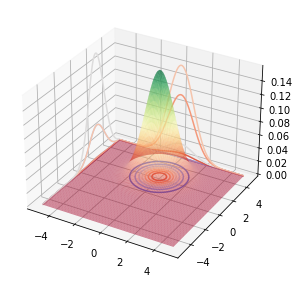

In [10]:
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0]
    Dgate(1) | q[0]
    Rgate(np.pi/2) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5,rstride=1, cstride=1,alpha=0.5)
ax.contour(X, P, Z, zdir='x', cmap=cm.coolwarm, offset=-5)
ax.contour(X, P, Z, zdir='y', cmap=cm.coolwarm, offset=5)
ax.contour(X, P, Z, zdir='z', cmap=cm.coolwarm, offset=0)
fig.set_size_inches(4.8, 5)

You can also see the effect by squeezing the state and rotating it. Let us squeeze along the $X$ axis with r = 1 and rotate it by 45 degrees clockwise seen from top.

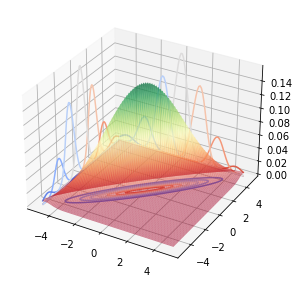

In [11]:
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0]
    Sgate(1) | q[0]
    Rgate(-np.pi/4) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5,rstride=1, cstride=1,alpha=0.5)
ax.contour(X, P, Z, zdir='x', cmap=cm.coolwarm, offset=-5)
ax.contour(X, P, Z, zdir='y', cmap=cm.coolwarm, offset=5)
ax.contour(X, P, Z, zdir='z', cmap=cm.coolwarm, offset=0)
fig.set_size_inches(4.8, 5)

## Exercise 1

Now, can you think of a way to get the final state above but by applying only a single gate, instead of Sgate and Rgate?

In [12]:
#YOUR SOLUTION HERE

Apart from these gates, there is also a gate called quadratic phase gate (implemented as Pgate in SF). This gate can be decomposed into the gates that we have learned so far. You will try to decompose it yourself in one of the assignment tasks, so we will not discuss it here.

<br>
<font style="font-size:20px;" align="left"><b> Non-Gaussian gates </b></font>
<br>

The single qumode gates that we have discussed so far are called Gaussian gates. They are called Gaussian gates because they preserve the Gaussianity of the states that they act upon. What it essentially means is that Gaussian states will stay Gaussian after being sent through Gaussian gates. There are other gates which are not Gaussian, e.g., cubic phase gate and Kerr gate. Here we will not discuss them in detail because we will not use them often. However, it is good to see some examples. For the purpose of this workshop, you just need to keep in mind that there exist gates that do not preserve Gaussianity.

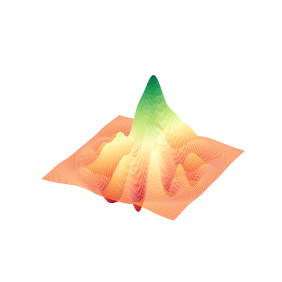

In [13]:
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0]
    gamma = 2
    Vgate(gamma) | q[0]

#We use the fock backend and define the argument cutoff_dim
eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

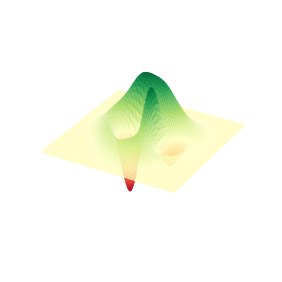

In [14]:
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0]
    kappa = 1
    Dgate(1) | q[0]
    Kgate(kappa) | q[0]

eng.reset()
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

<br>
<font style="font-size:20px;" align="left"><b> Two qumode gates </b></font>
<br>

As in other QC platforms where we can do operations on two qubits (two qubit gates), we can also do operations on two qumodes. One of the example (probably the most important one) is the beamsplitter.

This is implemented as BSgate($\theta$,$\phi$) which takes two parameters. The action that it does on qumodes are pretty complicated. However, one can see the action it does on the quadrature operators:

$B^{\dagger}(\theta, \phi) \hat{x}_{1} B(\theta, \phi)=\hat{x}_{1} \cos (\theta)-\sin (\theta)\left[\hat{x}_{2} \cos (\phi)+\hat{p}_{2} \sin (\phi)\right]$

$B^{\dagger}(\theta, \phi) \hat{p}_{1} B(\theta, \phi)=\hat{p}_{1} \cos (\theta)-\sin (\theta)\left[\hat{p}_{2} \cos (\phi)-\hat{x}_{2} \sin (\phi)\right]$

$B^{\dagger}(\theta, \phi) \hat{x}_{2} B(\theta, \phi)=\hat{x}_{2} \cos (\theta)+\sin (\theta)\left[\hat{x}_{1} \cos (\phi)-\hat{p}_{1} \sin (\phi)\right]$

$B^{\dagger}(\theta, \phi) \hat{p}_{2} B(\theta, \phi)=\hat{p}_{2} \cos (\theta)+\sin (\theta)\left[\hat{p}_{1} \cos (\phi)+\hat{x}_{1} \sin (\phi)\right]$

If the BSgate parameters are not specified, by default a 50-50 beamsplitter BSgate(pi/4,0) is applied.

<a><img src="./BS_homodyne.svg" align="left" width ="600"></a>

In [15]:
#we will have two qumodes
prog = sf.Program(2)
eng = sf.Engine("gaussian")

with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    Vac | q[1]
    #apply displacement on X axis
    Dgate(1) | q[0]
    Dgate(2) | q[1]
    #apply beamsplitter
    BSgate() | (q[0], q[1])
    #measure the X quadratures
    MeasureHomodyne(0) | q[0]
    MeasureHomodyne(0) | q[1]

#declare array to store our measurement results
x = np.zeros((2,1000))
    
#repeat measurement n times and store to the array
n = 1000
for i in range(n):
    results = eng.run(prog)
    x[:,i] = np.array(results.samples)

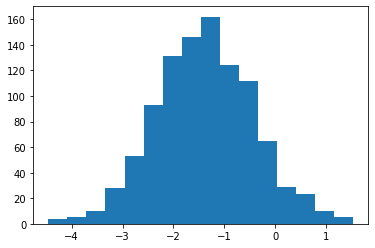

In [16]:
#view the histogram of Homodyne measurement of the first qumode q[0]
plt.hist(x[0,:],bins=16)
plt.show()

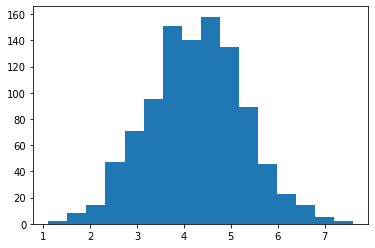

In [17]:
#view the histogram of Homodyne measurement of the first qumode q[1]
plt.hist(x[1,:],bins=16)
plt.show()

Another type of gate is called controlled-X or sum gate, denoted by CXgate(s) in SF. This gate takes one parameter and the action it does on the quadrature operators are as follows

$\mathrm{CX}(s)^{\dagger} \hat{x}_{1} \mathrm{CX}(s)=\hat{x}_{1}$

$\mathrm{CX}(s)^{\dagger} \hat{p}_{1} \mathrm{CX}(s)=\hat{p}_{1}-s \hat{p}_{2}$

$\mathrm{CX}(s)^{\dagger} \hat{x}_{2} \mathrm{CX}(s)=\hat{x}_{2}+s \hat{x}_{1}$

$\mathrm{CX}(s)^{\dagger} \hat{p}_{2} \mathrm{CX}(s)=\hat{p}_{2}$

For example, the X quadrature of the second output qumode of a CXgate(1) will be the sum (or addition) of the quadratures of the input qumodes, while the X quadrature of the first output mode is the same as the quadrature of the first input. That is why it is called sum or addition gate. Let's try to implement this

In [18]:
#we will have two qumodes
prog = sf.Program(2)
eng = sf.Engine("gaussian")

with prog.context as q:
    #initialize as vacuum
    Vac | q[0]
    Vac | q[1]
    #apply displacement on X axis
    Dgate(1) | q[1]
    #apply beamsplitter
    CXgate(1) | (q[0], q[1])
    #measure the X quadratures
    MeasureHomodyne(0) | q[0]
    MeasureHomodyne(0) | q[1]

#declare array to store our measurement results
x = np.zeros((2,1000))
    
#repeat measurement n times and store to the array
n = 1000
for i in range(n):
    results = eng.run(prog)
    x[:,i] = np.array(results.samples)

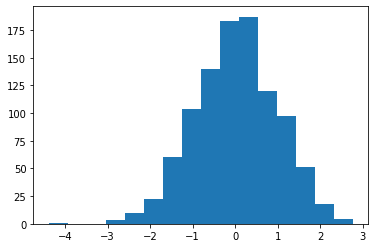

The mean of the X quadrature of q[0] is 0.008406523636897627


In [19]:
#view the histogram of Homodyne measurement of the first qumode q[0]
plt.hist(x[0,:],bins=16)
plt.show()
print("The mean of the X quadrature of q[0] is",np.mean(x[0,:]))

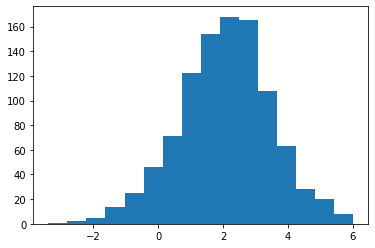

The mean of the X quadrature of q[1] is 2.048423508816114


In [20]:
#view the histogram of Homodyne measurement of the first qumode q[0]
plt.hist(x[1,:],bins=16)
plt.show()
print("The mean of the X quadrature of q[1] is",np.mean(x[1,:]))

## Exercise 2

The CX gate can in fact be decomposed into two squeezing gate sandwiched between two BS gate. You are given that

$\mathrm{CX}(s)=B\left(\frac{\pi}{2}+\theta, 0\right)(S(r, 0) \otimes S(-r, 0)) B(\theta, 0)$

with some parameter s, r, and $\theta$ which is related in a certain way. 

In plain words, applying CX is equivalent to applying beamsplitter with parameters $\theta$ and 0, followed by squeezing gate $S(r,0)$ on one qumode and $S(-r,0)$ on the other qumode, and finally followed by another beamsplitter with parameters $\theta + \frac{\pi}{2}$ and 0.

Can you think about how to implement CXgate(1) using two squeezing gate and two BS gate? Implement the circuit in the cell below and verify the result by performing Homodyne measurement at the end. Take 5000 samples and find the mean of the X quadrature of the second input.

In [21]:
#YOUR SOLUTION HERE

Apart from BS and CX, we also have controlled phase (implemented as CPgate in SF) and two-mode squeezing gate (implemented as S2gate in SF). All of these are Gaussian gates. There are also two-qumode non-Gaussian gates, one of them is called cross-Kerr gate (implemented as CKgate in SF). For those who are interested, you can take a look at LINK.